<center>
<img src="../../img/beeline_data_school_logo.png">
# "Прикладной анализ данных"
#### Интенсивный курс по изучению машинного обучения и анализа данных
<img src="../../img/beeline_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

## Практическое задание. Анализ данных пассажиров "Титаника"

In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_colwidth', 1000)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Считаем данные из файла в память в виде объекта Pandas.DataFrame

In [2]:
data = pd.read_csv('../../datasets/titanic/train.csv')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Возьмем первые 10 элементов столбца Parch - количество родителей и детей пассажира на борту:**

In [4]:
data['Parch'][:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Parch, dtype: int64

**Отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br />
Если нет - посмотрите, как вычисляется выражение в квадратных в скобках.

In [5]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


**1. Сколько мужчин / жещин находилось на борту?**

In [6]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение погибших/выживших по переменной Pclass (социально-экономический статус). Дополнительно - это же распределение, но еще учитывая пол.**


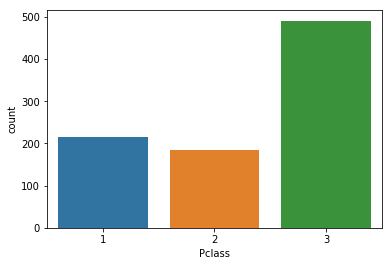

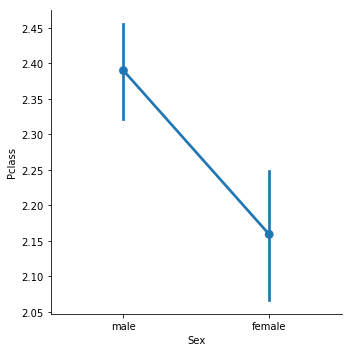

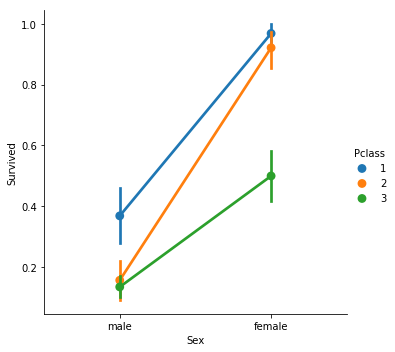

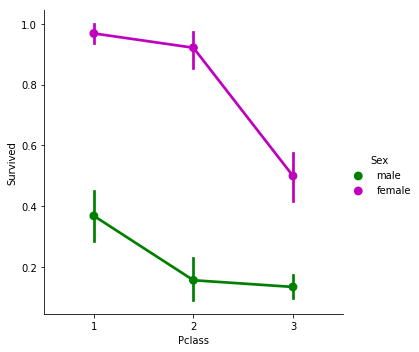

In [7]:
# кол-во по каждому классу
sns.countplot(data['Pclass']);
# кол-во по каждому классу
sns.catplot(x="Sex", y="Pclass", kind="point", data=data);
# кол-во по каждому классу учитывая пол
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=data);
# тоже самое что и выше
sns.catplot(x="Pclass", y="Survived", hue="Sex",
            palette={"male": "g", "female": "m"},
            kind="point", data=data);

**3. Сколько в среднем заплатил один пассажир? Найдите дисперсию этой величины. Сколько все пассажиры заплатили в сумме?**

In [17]:
print("в среднем заплатил один пассажир: " + str(round(data['Fare'].mean(), 2)))
print("дисперсия: " + str(round(data['Fare'].std(), 2)))
print("все пассажиры в сумме: " + str(round(data['Fare'].sum(), 2)))

в среднем заплатил один пассажир: 32.2
дисперсия: 49.69
все пассажиры в сумме: 28693.95


**4. Правда ли, что молодые выживали чаще (с большей вероятностью), чем старики? Пусть "молодые" - те, кто моложе 30, а "старики" - те, кто старше 60.**

In [66]:
print("процент выживших молодых:", (sum((data['Age'] < 30) & (data['Survived'] == 1)) / sum(data['Age'] < 30) * 100).round(2))
print("процент выживших стариков:", (sum((data['Age'] > 60) & (data['Survived'] == 1)) / sum(data['Age'] > 60) * 100).round(2))


процент выживших молодых: 40.62
процент выживших стариков: 22.73


**5. Правда ли, что женщины выживали чаще мужчин?**

In [79]:
print("процент выживших мужчин:", (sum((data['Sex'] == 'male') & (data['Survived'] == 1)) / sum(data['Sex'] == 'male') * 100).round(2))
print("процент выживших женщин:", (sum((data['Sex'] == 'female') & (data['Survived'] == 1)) / sum(data['Sex'] == 'female') * 100).round(2))


процент выживших мужчин: 18.89
процент выживших женщин: 74.2


**6. Какое самое популярное имя среди пассажиров Титаника мужского пола?**

In [337]:
data = pd.read_csv('../../datasets/titanic/train.csv')
data['Name'] = data['Name'].str.replace('\,|\.|\"|\)|\(|Mr|Jr|Dr|Rev|Master', '')
pd.value_counts(data[(data['Sex'] == 'male')]['Name']
                .apply(lambda x: x.split(' ')).sum(axis=0), sort=True).head(10)


           583
William     49
John        36
Henry       29
George      22
James       20
Charles     19
Thomas      16
Edward      14
Johan       13
dtype: int64

**7. Сравните распределение стоимости билетов у спасенных и у погибших.**

In [12]:
# Ваш код здесь

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?**

In [13]:
# Ваш код здесь